In [ ]:
!pip install bt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.0/262.0 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bt: filename=bt-1.0.0-cp310-cp310-linux_x86_64.whl size=1015435 sha256=f219f3779a3875c5831b198b10994e52e5090af2d39b5ca13eec57b707ef1f35
  Stored in directory: /root/.cache/pip/wheels/c2/3c/73/4e5b211517dfebf9e7fdcfdffe29bb1cd7b808ba1d8564f2a8
  Created wheel for ffn: filename=ffn-1.0.1-py3-none-any.whl size=25938 sha256=9b65c21badb25bd01a70c04008034af5a0328e6c76b48c6520bf3b68db17c2a5
  Stored in directory: /root/.cache/pip/wheels/fe/3b/9e/03d2054e1f3c003ea6c6775023acae481fbe50a40c243e3c94
Successfully built bt ffn
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorato

In [ ]:
import bt
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import warnings


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Stat                 spy         benchmark
-------------------  ----------  -----------
Start                2023-04-30  2023-04-30
End                  2024-04-30  2024-04-30
Risk-free rate       0.00%       0.00%

Total Return         15.54%      9.71%
Daily Sharpe         1.82        0.44
Daily Sortino        3.29        0.83
CAGR                 15.51%      9.68%
Max Drawdown         -7.05%      -36.05%
Calmar Ratio         2.20        0.27

MTD                  -2.82%      -11.04%
3m                   1.84%       -13.26%
6m                   14.85%      16.10%
YTD                  4.18%       -21.24%
1Y                   15.54%      9.71%
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  15.51%      9.68%

Daily Sharpe         1.82        0.44
Daily Sortino        3.29        0.83
Daily Mean (ann.)    14.78%      14.68%
Daily Vol (ann.)     8.14%       33.09%
Daily Skew           -0.03       0.46
Daily Kur

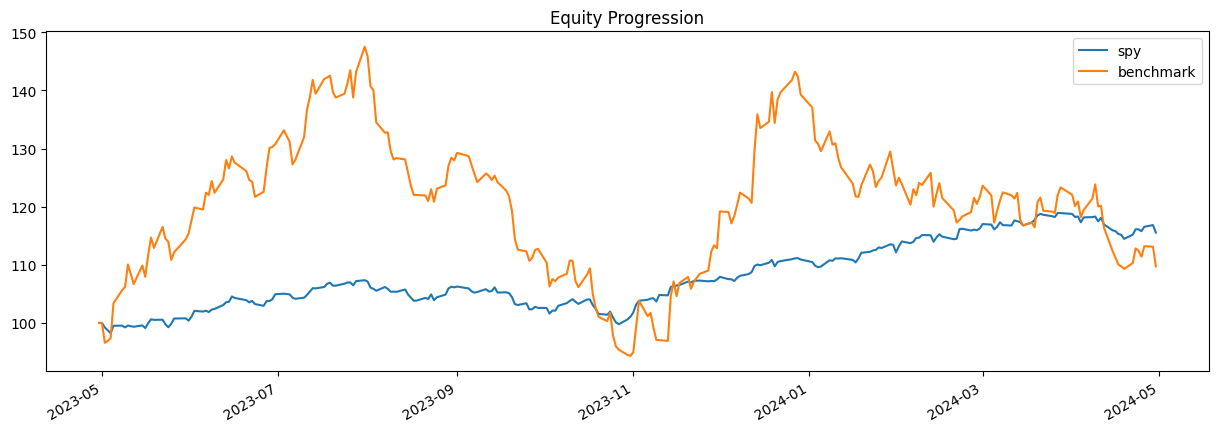

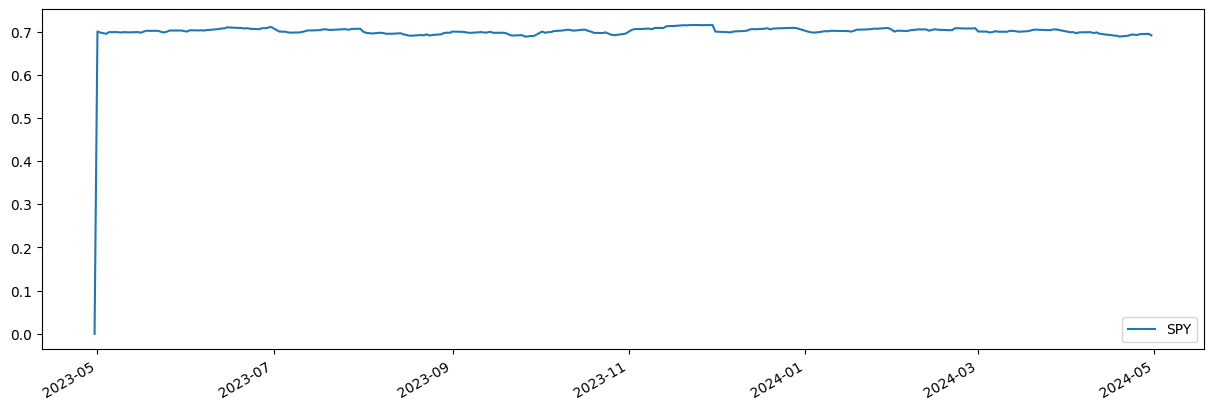

In [ ]:
med_tickers= 'TDOC, EXAS, ISRG, ALGN, TECH, SQ, UPST, SOFI, LC, AFRM, RDFN, Z, OPEN, INVH, PLD, FNV, NTR, DAR, ALB, SGML, SPY'
# fetch some data
med_data = bt.data.get(med_tickers , start='2023-05-01', end='2024-05-01', clean_tickers=False)

med_all = bt.Strategy('med_commodities', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(4, lookback=pd.DateOffset(3)),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                    ['TDOC', 'EXAS', 'ISRG', 'ALGN', 'TECH', 'SQ', 'UPST', 'SOFI', 'LC', 'AFRM', 'RDFN', 'Z', 'OPEN', 'INVH', 'PLD', 'FNV', 'NTR', 'DAR', 'ALB', 'SGML'])


med_final = bt.Strategy('med_result', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighSpecified(med_all = 0.2, SPY = 0.8),
                                bt.algos.Rebalance()],
                    [med_all,'SPY'])

# benchmark
test_SPY = bt.Strategy('benchmark', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                       ['TDOC', 'EXAS', 'ISRG', 'ALGN', 'TECH', 'SQ', 'UPST', 'SOFI', 'LC', 'AFRM', 'RDFN', 'Z', 'OPEN', 'INVH', 'PLD', 'FNV', 'NTR', 'DAR', 'ALB', 'SGML', 'SPY'])


med_final = bt.Strategy('spy', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighSpecified(SPY = 0.7),
                                bt.algos.Rebalance()],
                    ['SPY'])
# backtest and run
med_test = bt.Backtest(med_final, med_data)
bench_mark = bt.Backtest(test_SPY, med_data)
med_results = bt.run(med_test, bench_mark)
med_results.display()
med_results.plot()
med_results.plot_security_weights()
#med_results.plot_scatter_matrix()

In [ ]:
pip install newsapi-python

In [ ]:
from newsapi import NewsApiClient
start_date='2023-05-01'
end_date='2024-05-01'
# Initialize the news API client
newsapi = NewsApiClient(api_key='97acb84323c049b8b2cf36317c05143c')

# Fetch news articles mentioning 'SPY'
all_articles = newsapi.get_everything(q='SPY',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

articles = all_articles['articles']


In [ ]:
pip install TextBlob

In [ ]:
content

'Microsoft Store has 25-Film The James Bond Collection (Digital HD Films) for $4.99.Thanks to Deal Editor SubZero5 for posting this deal.\r\nNote: These titles are not\r\n Movies Anywhere (MA) eligible; m… [+684 chars]'

In [ ]:
 from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1

# Apply sentiment analysis to each article
for article in articles:
    description = article.get('description')
    if description:
        article['sentiment'] = analyze_sentiment(description)
    else:
        article['sentiment'] = None  # Handle articles with no description

# Convert the articles to a DataFrame
sentiment_df = pd.DataFrame(articles)
sentiment_df['publishedAt'] = pd.to_datetime(sentiment_df['publishedAt'])
sentiment_df.set_index('publishedAt', inplace=True)

# Filter out articles without sentiment scores
sentiment_df = sentiment_df.dropna(subset=['sentiment'])

# Resample sentiment data to match the frequency of market data (e.g., daily)
daily_sentiment = sentiment_df['sentiment'].resample('D').mean()
# Ensure your daily_sentiment series only includes the specified date range
filtered_daily_sentiment = pd.DataFrame(daily_sentiment[start_date:end_date])
new = pd.DataFrame(filtered_daily_sentiment.values, index=pd.date_range(start=start_date, end=end_date), columns=['Sentiment'])

In [ ]:
spy_data['Sentiment'].unique()

array([0.])

In [ ]:
import pandas as pd

# Fetch historical market data for SPY
spy_data = bt.data.get('SPY' , start=start_date, end=end_date, clean_tickers=False)

# Merge sentiment data with market data
spy_data = new.join(spy_data, how = 'inner')
spy_data.fillna(0, inplace=True)

# Check the combined DataFrame
#spy_data.drop(['sentiment'], axis = 1, inplace = True)
spy_data

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


,Sentiment,SPY
2023-05-01,0.000000,409.578827
2023-05-02,0.000000,404.975464
2023-05-03,0.000000,402.195770
2023-05-04,0.000000,399.347015
2023-05-05,0.000000,406.739960
...,...,...
2024-04-24,0.000000,505.410004
2024-04-25,0.000000,503.489990
2024-04-26,0.000000,508.260010
2024-04-29,-0.122857,510.059998


In [ ]:
sma_short_1

NameError: name 'sma_short_1' is not defined

Stat                 MA_cross_1
-------------------  ------------
Start                2023-04-30
End                  2024-04-30
Risk-free rate       0.00%

Total Return         8.51%
Daily Sharpe         1.62
Daily Sortino        2.68
CAGR                 8.49%
Max Drawdown         -3.77%
Calmar Ratio         2.25

MTD                  -2.82%
3m                   1.84%
6m                   8.51%
YTD                  4.17%
1Y                   8.51%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  8.49%

Daily Sharpe         1.62
Daily Sortino        2.68
Daily Mean (ann.)    8.30%
Daily Vol (ann.)     5.13%
Daily Skew           0.12
Daily Kurt           4.04
Best Day             1.45%
Worst Day            -1.14%

Monthly Sharpe       1.40
Monthly Sortino      2.96
Monthly Mean (ann.)  8.36%
Monthly Vol (ann.)   5.99%
Monthly Skew         -0.02
Monthly Kurt         0.80
Best Month           3.64%
Worst Month          -2.82%

Yearly Sharpe      

Text(0.5, 0.98, 'Return Scatter Matrix')

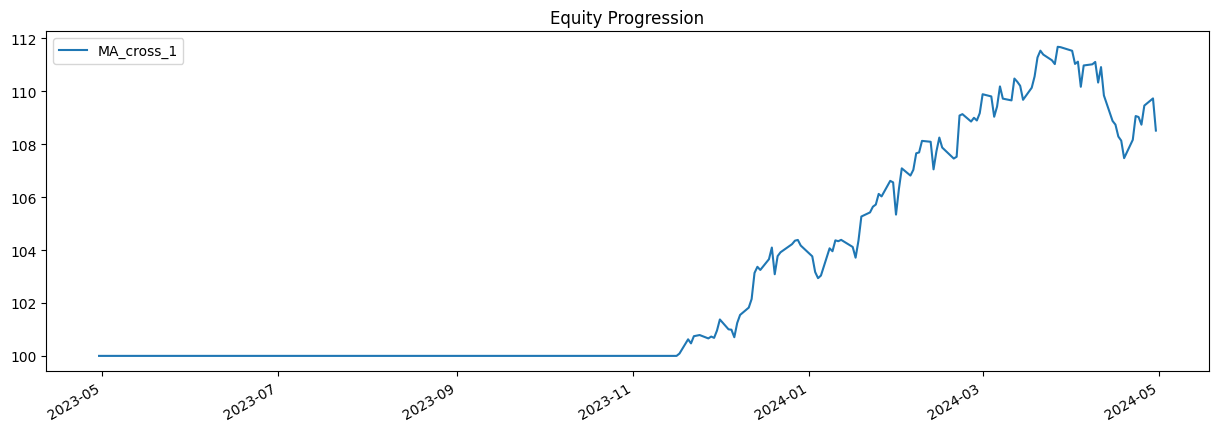

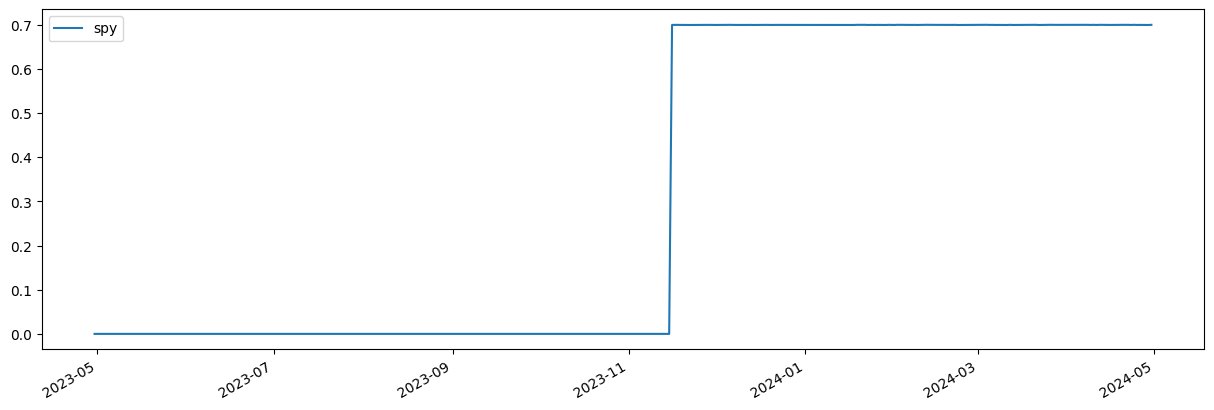

<Figure size 640x480 with 0 Axes>

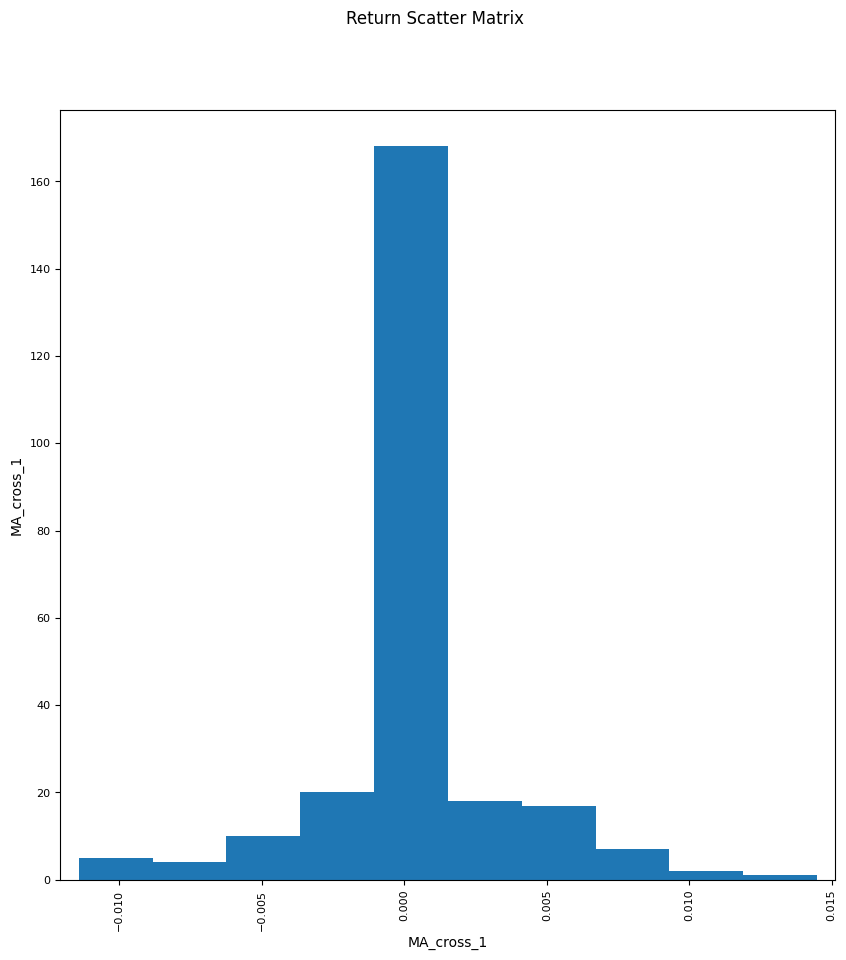

In [ ]:
datasp = bt.get('spy', start=start_date, end=end_date)
# define the length of the short and long averages
short_1 = 80
long_1 = 140

# Calculate moving average DataFrame using rolling.mean
sma_short_1 = datasp.rolling(short_1).mean()
sma_long_1 = datasp.rolling(long_1).mean()

target_weights_1 = sma_long_1.copy()

# We want 1/N bet on each asset, and length of tickers is the number of assets N
magnitude = 0.7
# Set appropriate target weights based on the position of the curves.
# Note that if sma_short_1 crossed moving up, sma_short_1>sma_long_1 is true
target_weights_1[sma_short_1 > sma_long_1] =  magnitude
target_weights_1[sma_short_1 <= sma_long_1] = -magnitude

# Now set up the MA_cross strategy for our moving average cross strategy
MA_cross_1 = bt.Strategy('MA_cross_1', [bt.algos.WeighTarget(target_weights_1),
                                        bt.algos.Rebalance()])
# Create backtests for both strategies
test_MA_1 = bt.Backtest(MA_cross_1, datasp)
res_MA_1 = bt.run(test_MA_1)
# Show the computed results
res_MA_1.display()

res_MA_1.plot()

In [ ]:
target_weights_2

,SPY
2023-05-01,0.60
2023-05-02,0.60
2023-05-03,0.60
2023-05-04,0.60
2023-05-05,0.60
...,...
2024-04-24,0.60
2024-04-25,0.60
2024-04-26,-0.66
2024-04-29,-0.66


Stat                 MA_Sentiment
-------------------  --------------
Start                2023-04-30
End                  2024-04-30
Risk-free rate       0.00%

Total Return         12.44%
Daily Sharpe         2.17
Daily Sortino        4.07
CAGR                 12.41%
Max Drawdown         -3.77%
Calmar Ratio         3.29

MTD                  0.69%
3m                   5.52%
6m                   12.44%
YTD                  7.94%
1Y                   12.44%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  12.41%

Daily Sharpe         2.17
Daily Sortino        4.07
Daily Mean (ann.)    11.88%
Daily Vol (ann.)     5.47%
Daily Skew           1.15
Daily Kurt           8.35
Best Day             2.22%
Worst Day            -1.14%

Monthly Sharpe       2.58
Monthly Sortino      inf
Monthly Mean (ann.)  11.88%
Monthly Vol (ann.)   4.61%
Monthly Skew         1.18
Monthly Kurt         0.03
Best Month           3.64%
Worst Month          0.00%

Yearly Sharp

<Axes: title={'center': 'Equity Progression'}>

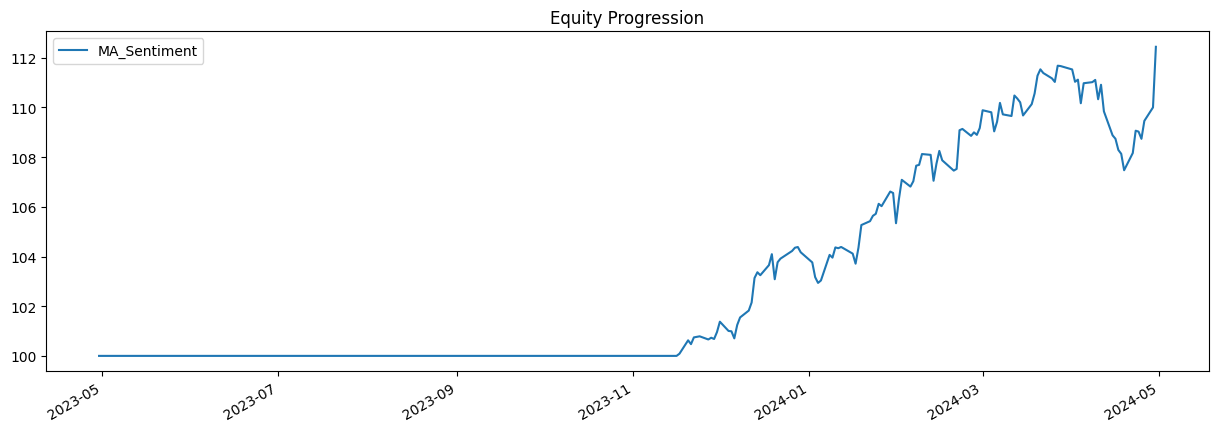

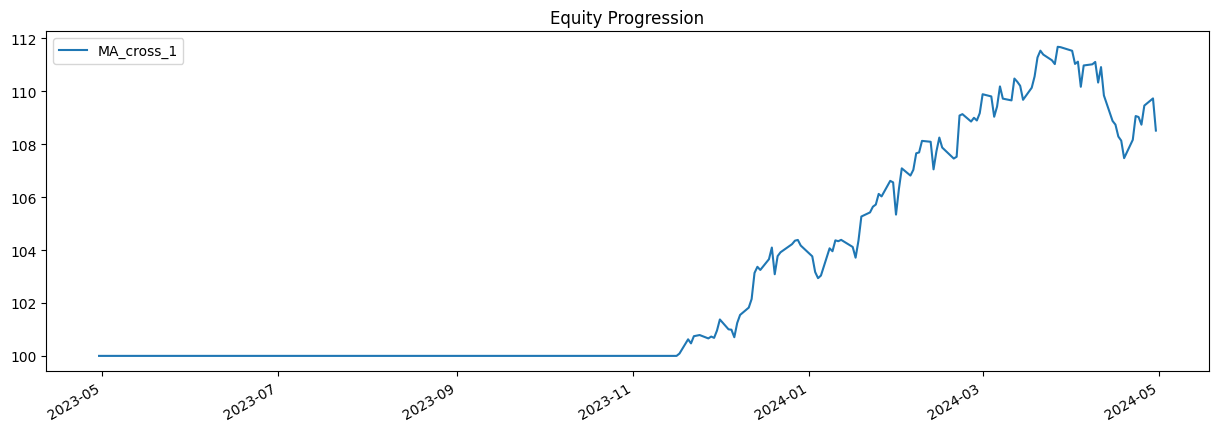

In [ ]:
filtered_daily_sentiment = spy_data['Sentiment'].rolling(window=1).mean()  # Simulating a rolling sentiment score
spy_data['Sentiment'] = filtered_daily_sentiment
spy_data.fillna(0, inplace = True)
# Calculate moving averages
short_2 = 80
long_2 = 140
sma_short_2 = pd.DataFrame(spy_data['SPY'].rolling(short_2).mean())
sma_long_2 = pd.DataFrame(spy_data['SPY'].rolling(long_2).mean())

# Initialize target weights
target_weights_2 = sma_long_2.copy()

# Parameters for sentiment boosts
diff = 2

# Adjust weights based on moving average crossovers and sentiment
target_weights_2[sma_short_2 > sma_long_2] =  0.7
target_weights_2[sma_short_2 <= sma_long_2] = -0.7
# Buy signal with positive sentiment boost
target_weights_2[(spy_data['Sentiment'] > 0)] = 0.7 * diff

# Sell signal with negative sentiment boost
target_weights_2[(spy_data['Sentiment'] < 0)] = -0.7 * diff

# Define the strategy
sentiment_strategy = bt.Strategy('MA_Sentiment', [bt.algos.WeighTarget(target_weights_2),
                                                     bt.algos.Rebalance()])

# Create and run the backtest
test_sentiment = bt.Backtest(sentiment_strategy, spy_data)
res_sentiment = bt.run(test_sentiment)

# Display the results
res_sentiment.plot()
res_sentiment.display()
res_MA_1.plot()
#res_MA_1.plot_security_weights()

In [ ]:
# Define the parameter grid
short_range = range(20, 81, 5)  # short_1 moving averages: 20, 30, 40, 50, 60
long_range = range(80, 181, 5)  # long_1 moving averages: 80, 90, 100, 110, 120, 130, 140, 150

# Prepare to store results
results = []

for short_1 in short_range:
    for long_1 in long_range:
        # Calculate moving averages
        sma_short_1 = datasp.rolling(short_1).mean()
        sma_long_1 = datasp.rolling(long_1).mean()

        # Set target weights based on moving average crossovers
        target_weights_1 = sma_long_1.copy()
        magnitude = 1 / len(['spy'])
        target_weights_1[sma_short_1 > sma_long_1] = magnitude
        target_weights_1[sma_short_1 <= sma_long_1] = -magnitude

        # Define the strategy
        MA_cross_1 = bt.Strategy(f'MA_cross_{short_1}_{long_1}', [
            bt.algos.WeighTarget(target_weights_1),
            bt.algos.Rebalance()
        ])

        # Create and run the backtest
        test_MA_1 = bt.Backtest(MA_cross_1, datasp)
        res_MA_1 = bt.run(test_MA_1)

        # Store the results
        results.append({
            'short_1': short_1,
            'long_1': long_1,
            'CAGR': res_MA_1.stats.at['cagr', f'MA_cross_{short_1}_{long_1}'],
            'Max Drawdown': res_MA_1.stats.at['max_drawdown', f'MA_cross_{short_1}_{long_1}']
        })

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Display the results sorted by CAGR
print(results_df.sort_values(by='CAGR', ascending=False))

     short_1  long_1      CAGR  Max Drawdown
264       80     140  0.122672     -0.053539
243       75     140  0.122672     -0.053539
97        40     145  0.113517     -0.053522
223       70     145  0.110192     -0.053537
202       65     145  0.110192     -0.053537
..       ...     ...       ...           ...
154       55     115 -0.128912     -0.196249
194       65     105 -0.132514     -0.209579
252       80      80 -0.135123     -0.224807
234       75      95 -0.137760     -0.200088
213       70      95 -0.164062     -0.224518

[273 rows x 4 columns]


In [ ]:
sentiments

2023-05-01    1.807316
2023-05-02   -0.062009
2023-05-03    1.616798
2023-05-04   -0.851149
2023-05-05    1.878654
                ...   
2024-04-27    1.043125
2024-04-28    0.184726
2024-04-29   -0.754284
2024-04-30    0.636220
2024-05-01   -0.516886
Freq: D, Length: 367, dtype: float64